In [71]:
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', size=12, family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage{amssymb}\usepackage{amsmath}\usepackage{bm}'
plt.rcParams['figure.dpi'] = 300

In [8]:
#git_dir='/Users/anze/Git/pdb2xyz/'
git_dir='/home/anze/Work/Git/pdb2xyz/'

In [51]:
labels={'duello': 'pdb2xyz (duello)', 'propka': 'propKa', 'pqr': 'pdb2pqr'}
styles={'duello': '-', 'propka': '--', 'pqr': ':'}
colours={'duello': 'xkcd:terra cotta', 'propka': 'xkcd:pale purple', 'pqr': 'xkcd:ultramarine'}

### Lysozyme

In [56]:
os.chdir(git_dir + 'lysozyme_test/')

In [57]:
PDB_id='4LZT'
methods=['duello','propka','pqr']
pHs=['5.00','7.00','9.00']
#c0s=['0.01','0.05','0.1','1']
c0s=['0.01','0.1','1']
datasets=list(itertools.product(pHs,c0s,methods))

df={}

for pH,c0,method in datasets: df[(method,pH,c0)]=np.loadtxt('%s_%s_pH%s_c0%s_pmf.dat' % (PDB_id,method,pH,c0))

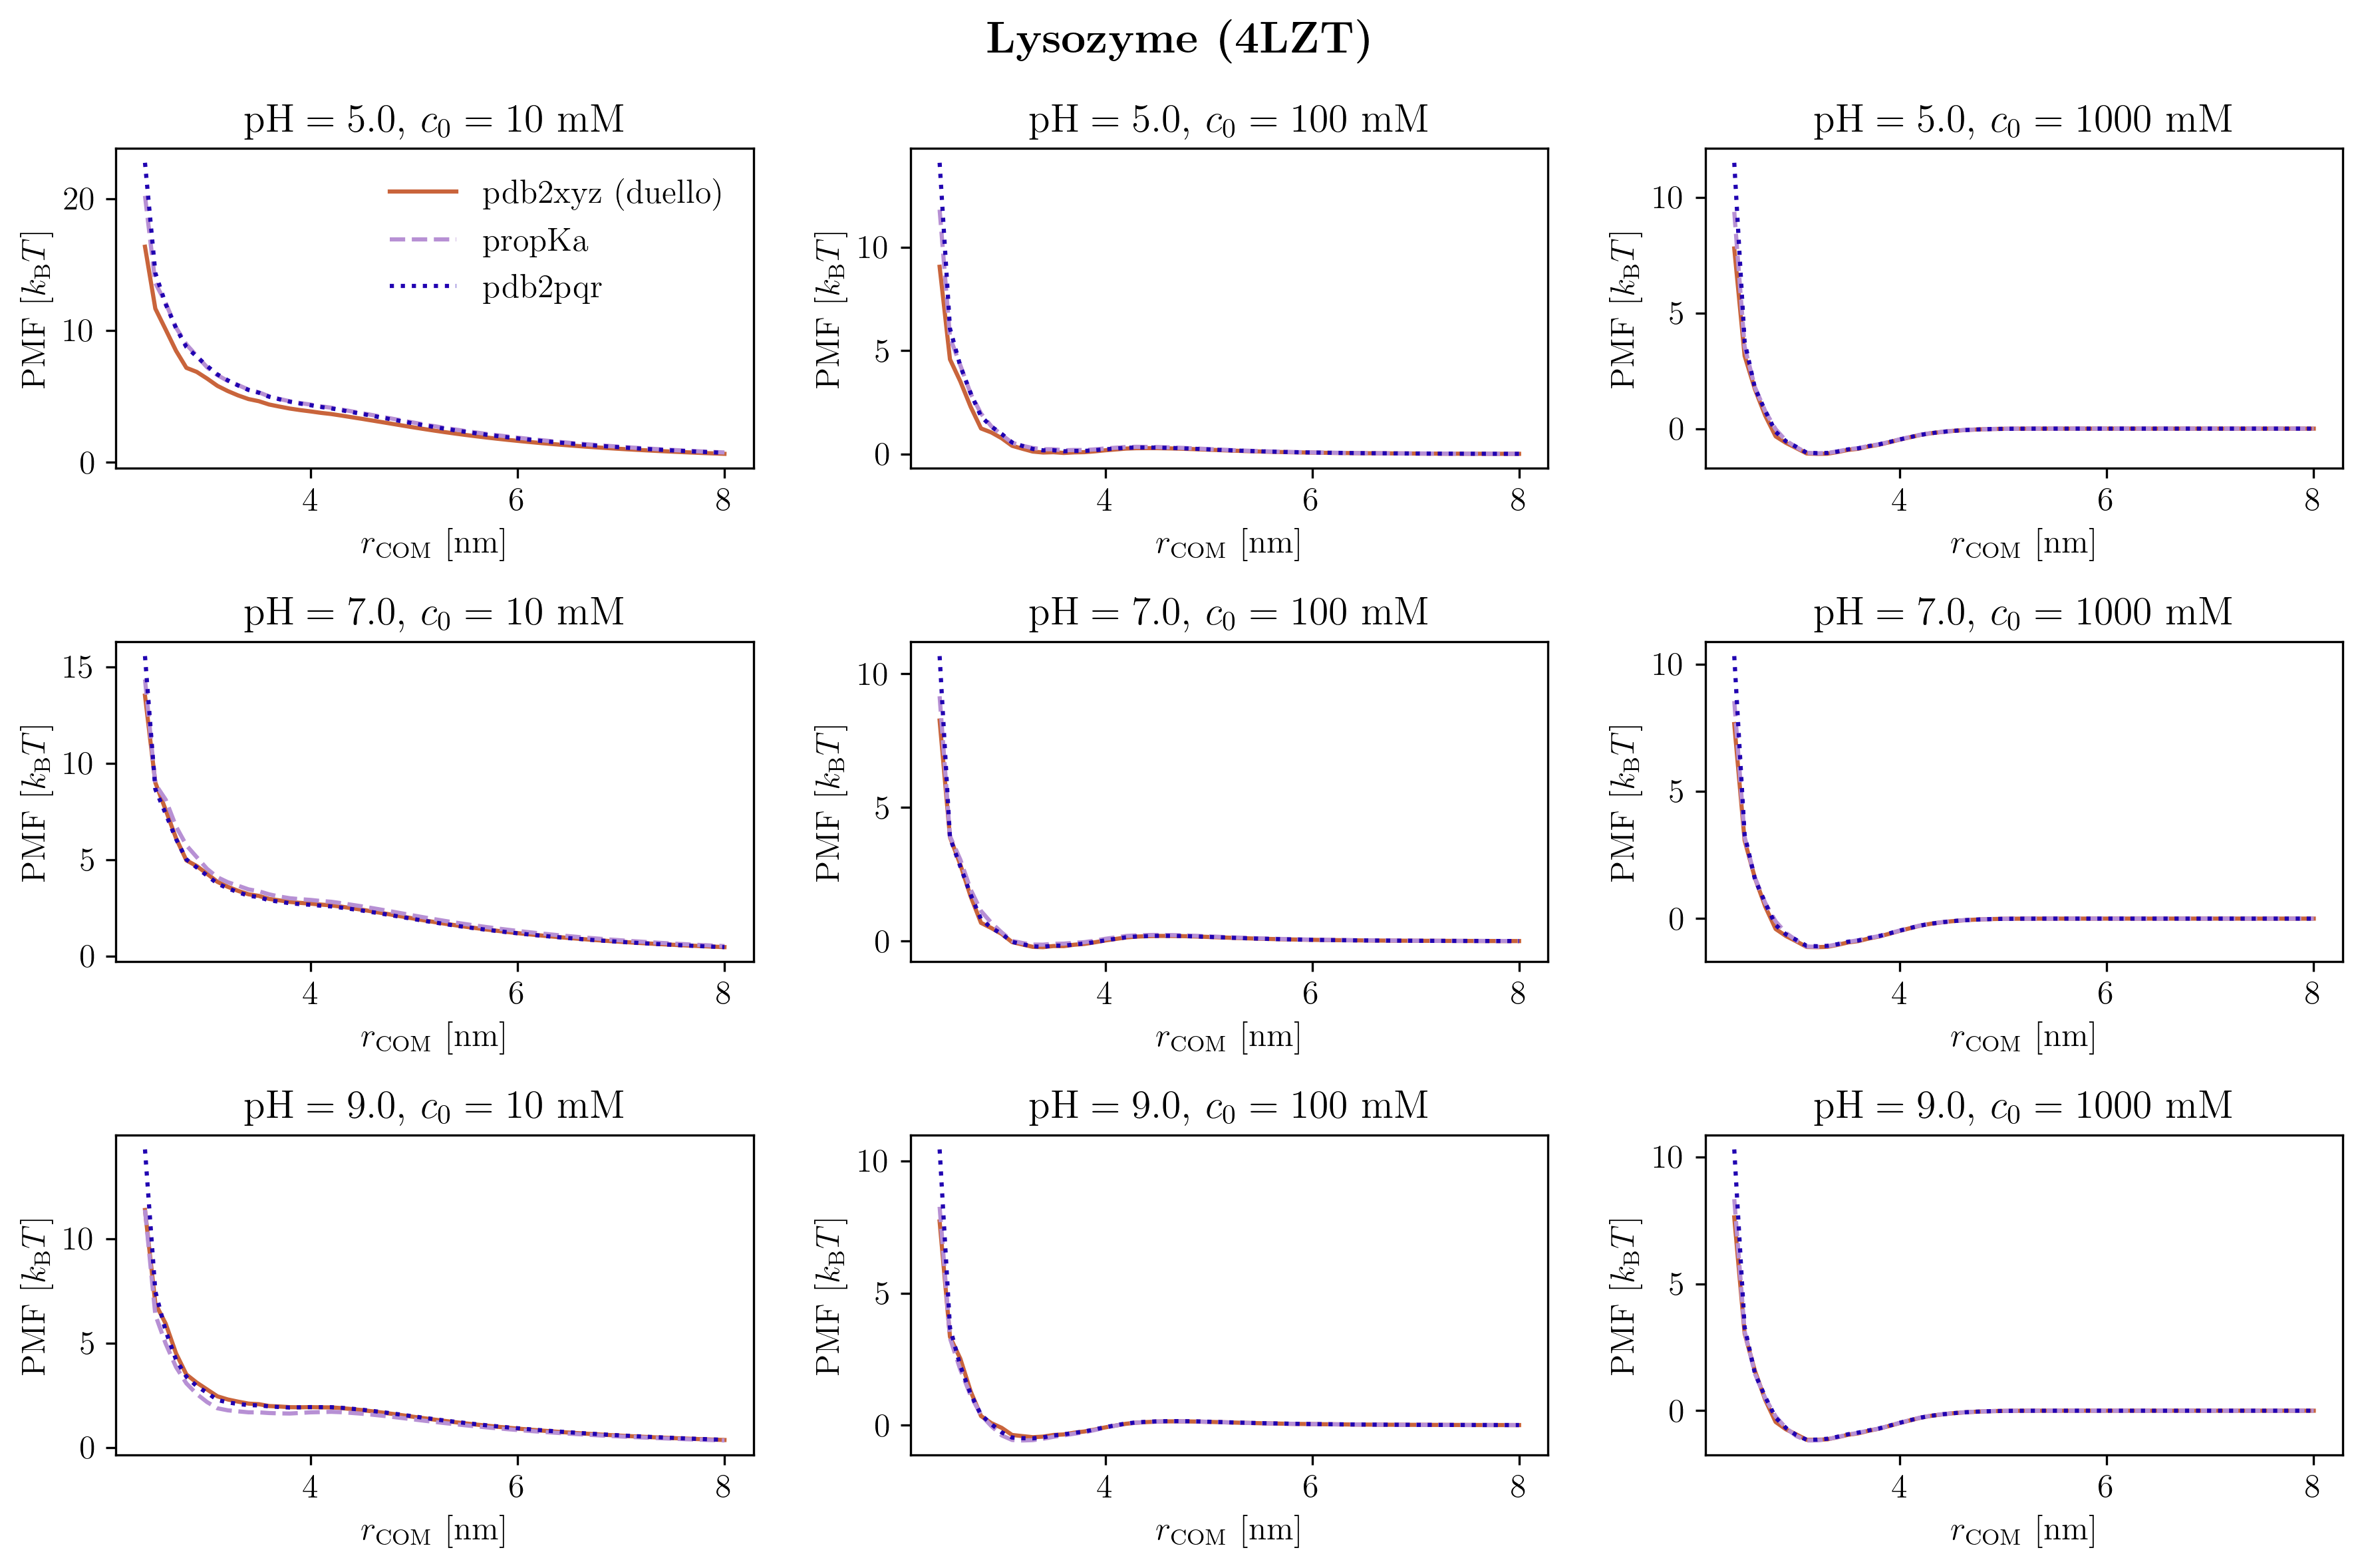

In [60]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(12,8))

figure.suptitle('\\textbf{Lysozyme (4LZT)}', fontsize=16)

for ax in figure.axes[1:]: ax.sharex(ax1)

for i,ax in enumerate(figure.axes):

    ax.set_xlabel("$r_\\mathrm{COM}$ [nm]")
    ax.set_ylabel("PMF [$k_\\mathrm{B}T$]")

    for pH,c0,method in datasets[i*3:i*3+3]:

        dset=df[(method,pH,c0)]
        ax.plot(0.1*dset[:,0],dset[:,1],label=labels[method],ls=styles[method],c=colours[method])

    ax.set_title("$\\mathrm{pH}=%.1f$, $c_0=%i$ mM" % (float(pH),int(1000*float(c0))))

ax1.legend(frameon=False)

figure.tight_layout()

plt.savefig('lysozyme_methods_comparison.png', format='png', bbox_inches='tight', dpi=300)
plt.savefig('lysozyme_methods_comparison.pdf', format='pdf', bbox_inches='tight', dpi=300)

### $\alpha$-Chymotrypsinogen

In [63]:
os.chdir(git_dir + 'cgn_test/')

In [64]:
PDB_id='7KTZ'
methods=['duello','propka','pqr']
pHs=['5.00','7.00','9.00']
#c0s=['0.01','0.05','0.1','1']
c0s=['0.01','0.1','1']
datasets=list(itertools.product(pHs,c0s,methods))

df={}

for pH,c0,method in datasets: df[(method,pH,c0)]=np.loadtxt('%s_%s_pH%s_c0%s_pmf.dat' % (PDB_id,method,pH,c0))

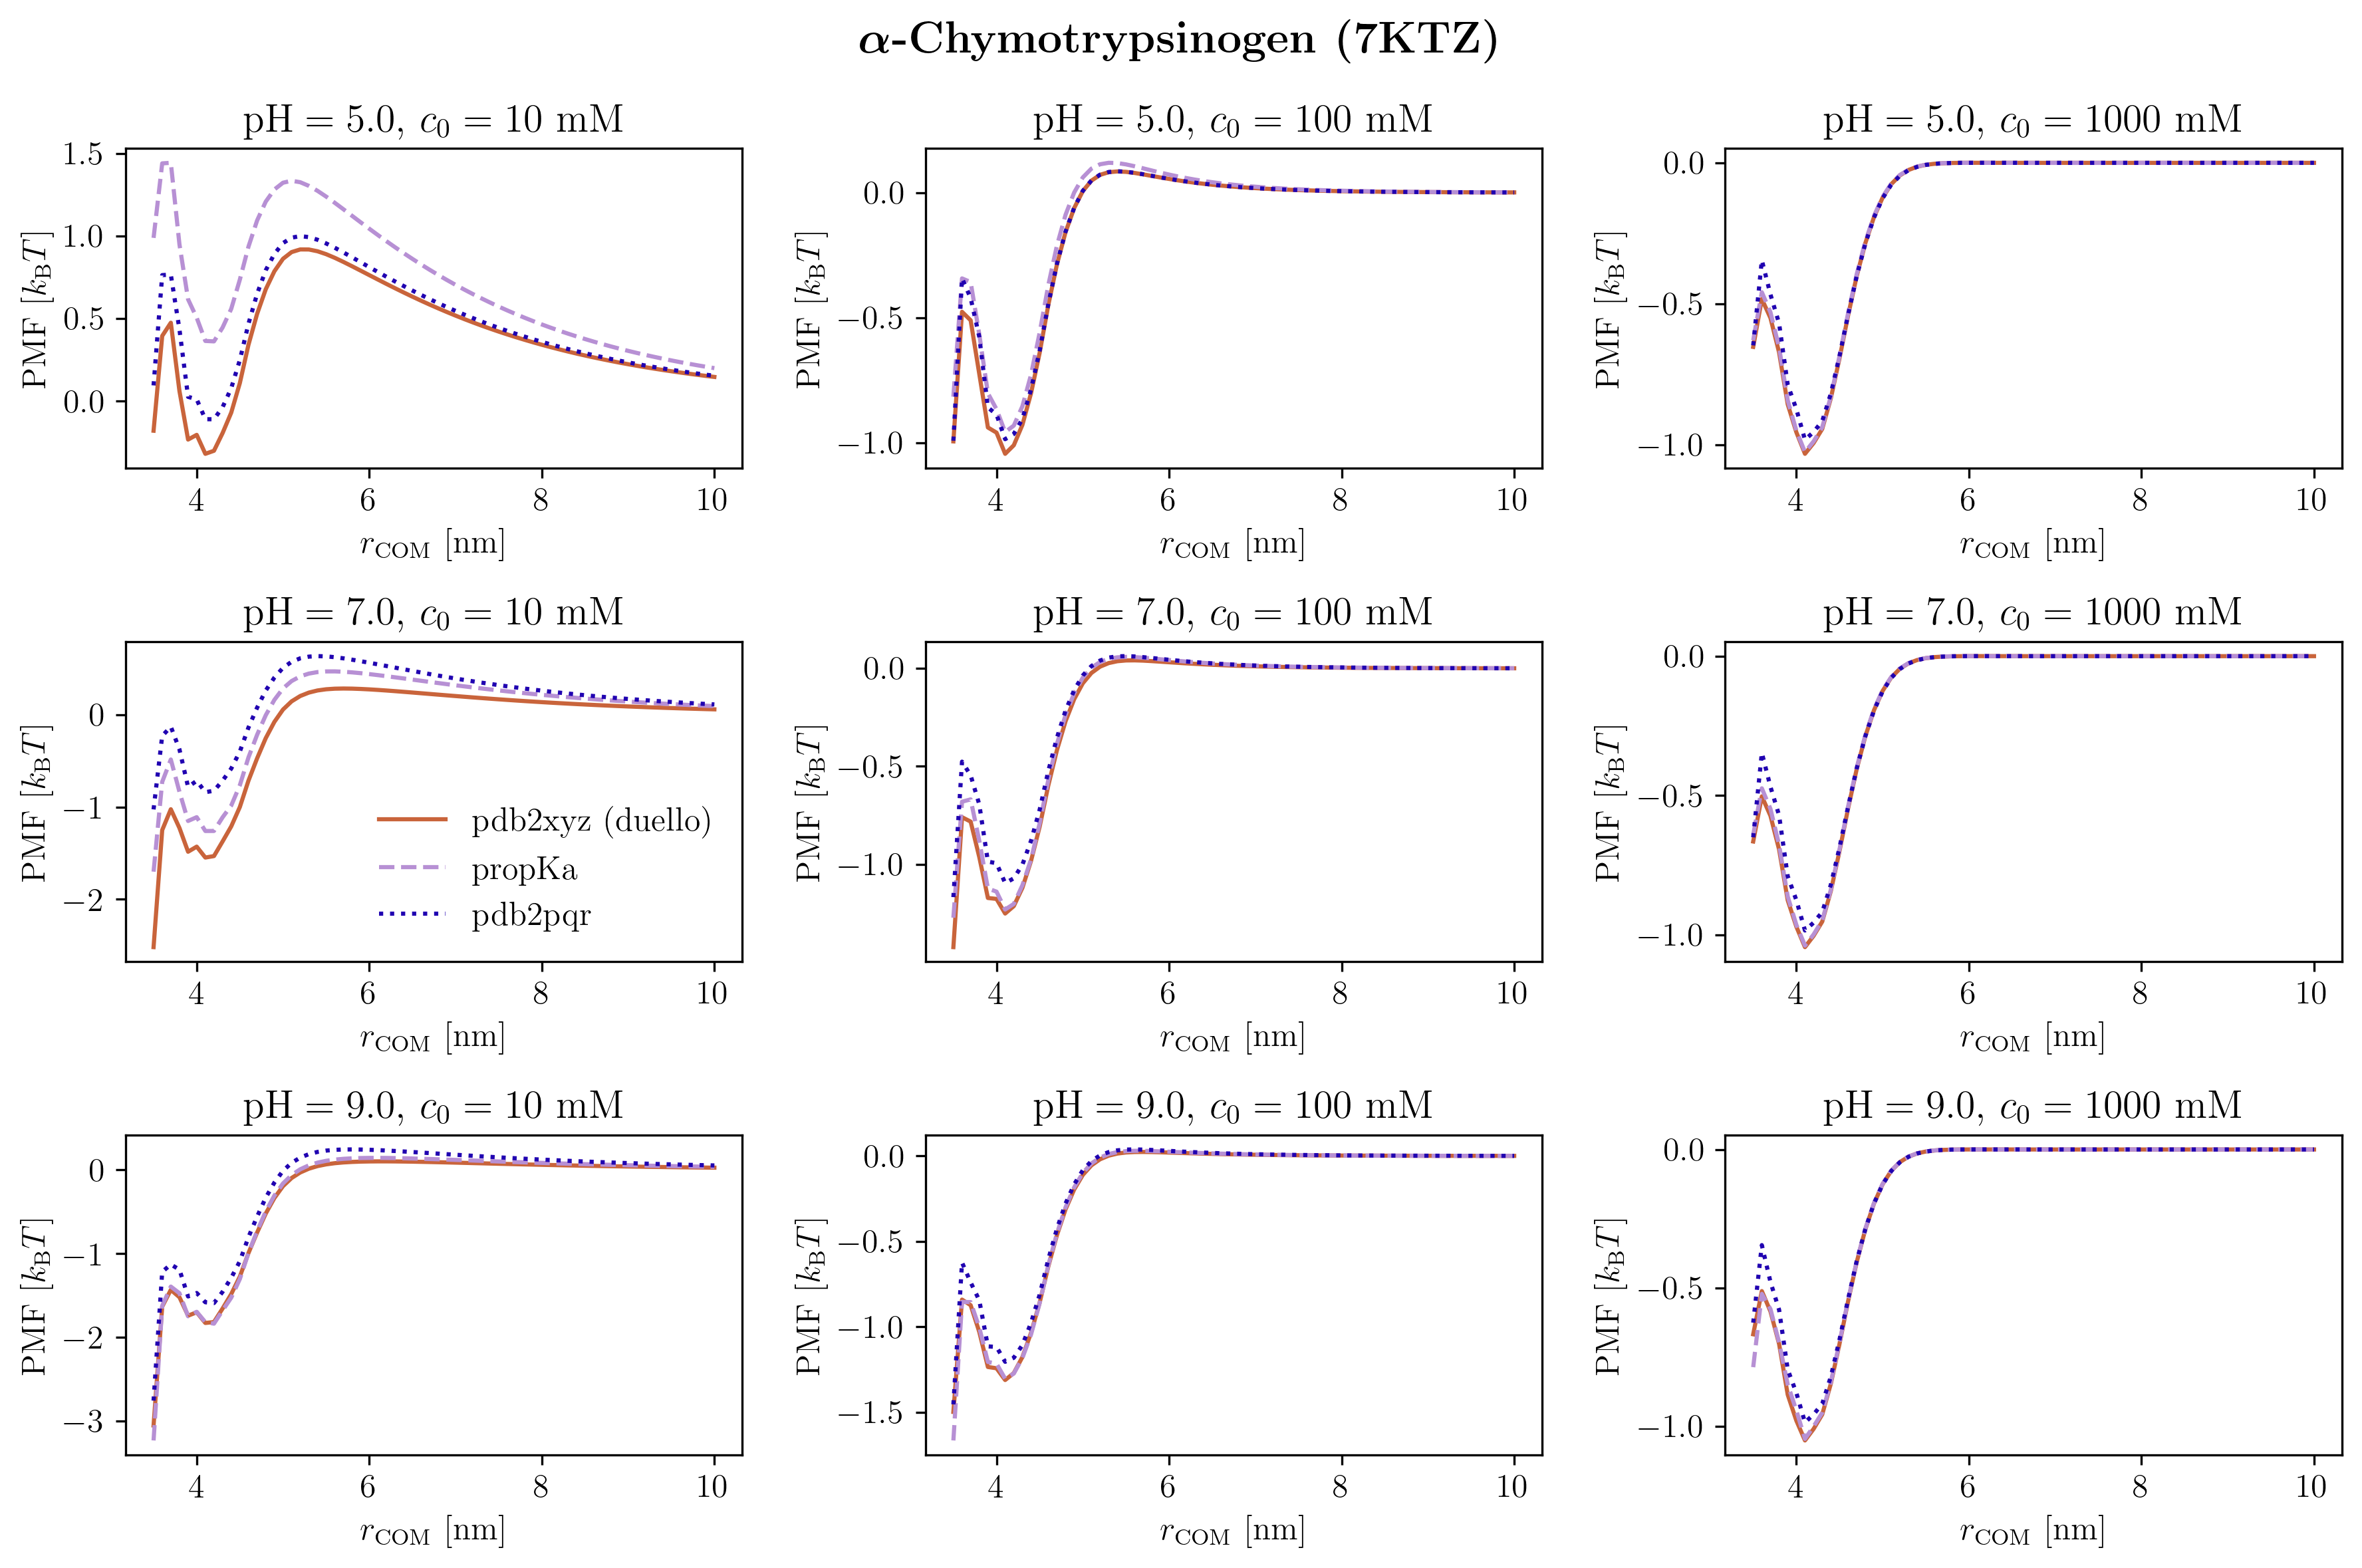

In [72]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(12,8))

figure.suptitle('$\\bm{\\alpha}$\\textbf{-Chymotrypsinogen (7KTZ)}', fontsize=16)

for ax in figure.axes[1:]: ax.sharex(ax1)

for i,ax in enumerate(figure.axes):

    ax.set_xlabel("$r_\\mathrm{COM}$ [nm]")
    ax.set_ylabel("PMF [$k_\\mathrm{B}T$]")

    for pH,c0,method in datasets[i*3:i*3+3]:

        dset=df[(method,pH,c0)]
        ax.plot(0.1*dset[:,0],dset[:,1],label=labels[method],ls=styles[method],c=colours[method])

    ax.set_title("$\\mathrm{pH}=%.1f$, $c_0=%i$ mM" % (float(pH),int(1000*float(c0))))

ax4.legend(frameon=False)

figure.tight_layout()

plt.savefig('chymotrypsinogen_methods_comparison.png', format='png', bbox_inches='tight', dpi=300)
plt.savefig('chymotrypsinogen_methods_comparison.pdf', format='pdf', bbox_inches='tight', dpi=300)